In [12]:
pip install Bio

Note: you may need to restart the kernel to use updated packages.


In [728]:
import Bio

In [729]:
from Bio.Seq import Seq

In [730]:
from Bio import SeqIO

In [780]:
import pandas as pd

In [732]:
from Bio.Data import CodonTable

1) Documenting Dr.X's function to retrieve sequences 

In [733]:
#Setting up sequence function from Dr.X 
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse("Fasfa_Python.txt", "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [734]:
#Checking OutPut 
get_sequences_from_file("Fasfa_Python.txt")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

2) Creating function for translation of DNA sequences in fasta file

In [735]:
#Checking to ensure Mito table works 
from Bio.Data import CodonTable
mito_table=CodonTable.unambiguous_dna_by_id[2]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [736]:
#Writing Function to Translate DNA Sequence from Fasta file to Amino Acids 

def translate_dna(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_id[2]
    aa_seq_string= ""
    aa= ""
    for i in range(0, len(string_nucleotides),3):
        codon=string_nucleotides[i:i+3]
        if codon not in mito_table.stop_codons:
            aa=mito_table.forward_table[codon]
            aa_seq_string += aa
    else:
        return(aa_seq_string)
    

In [737]:
#Checking "translate_dna" function created above 
seq_dat=get_sequences_from_file("Fasfa.Python.txt")["Pygoscelis antarctica"]
aa_seq=translate_dna(seq_dat)
print(aa_seq)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSIAHTCRDVQYGWLIRNMHANGASLLFICIYLHIGRGVYDGSYLHKETWNTGVILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTIVEWAWGGFSVDNPTLTRFFALHFLLPFMITGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFTLMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLVLFLSPLLHKSKQRTMAFRPLSQLLFWTLVANLLILTWIGSQPVEHPFIIIGQLASTTYFIILLILFPITSALENKMLNF


3) Improving translation function using the translation function from biopython 

In [738]:
def translate_redo(seq_dat):
    seq_dat_2=Seq(seq_dat)
    aa_seq= seq_dat_2.translate(mito_table, to_stop=True)
    return(aa_seq)
    
    

In [739]:
seq_dat_test= get_sequences_from_file("Fasfa_Python.txt")["Spheniscus humboldti"]
aa_seq1=translate_redo(seq_dat_test)

4) Creating Amino Acid Count function using ProtPram 

In [784]:
#ProtoParam Function for Molecular Weight of amino acid sequence 
from Bio.SeqUtils import ProtParam
from Bio.SeqUtils import molecular_weight
def molecular_weight(aa_seq):
    analysed_seq=ProteinAnalysis(aa_seq)
    molecular_weight=analysed_seq.molecular_weight()
    return(molecular_weight)
    

In [741]:
aa_seq1=str(aa_seq1)
molecular_weight(aa_seq1)

42399.55200000001

5) Creating GC Content function 


In [742]:
#Define function For GC Content 
from Bio.Seq import Seq
from Bio.SeqUtils import GC
def GC_Content(seq_dat):
    my_seq=seq_dat
    gc_percent= 100*float(my_seq.count("G")+my_seq.count("C"))/len(my_seq)
    return(gc_percent)
    

In [653]:
GC=GC_Content(seq_dat)
print(GC)

49.25634295713036


Penguin Data Set: Importing CSV File

In [654]:
cytb_seqs=get_sequences_from_file("Fasfa_Python.txt")
print(cytb_seqs)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

In [448]:
import pandas as pd

In [456]:
penguins_df=pd.read_csv("csv_python.txt")
species_list=list(penguins_df.species)
species_list

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

6) Adding Columns and Adding NA values

In [758]:
penguins_df["Molecular Weight"]="NAN"
penguins_df["GC Content"]= "NAN"
penguins_df

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,NAN,NAN
1,Aptenodytes patagonicus,13.40,NAN,NAN
2,Eudyptes chrysocome,2.80,NAN,NAN
3,Eudyptes chrysolophus,4.50,NAN,NAN
4,Eudyptes sclateri,4.25,NAN,NAN
5,Eudyptula minor,1.60,NAN,NAN
6,Pygoscelis adeliae,4.60,NAN,NAN
7,Pygoscelis antarctica,4.10,NAN,NAN
8,Pygoscelis papua,6.10,NAN,NAN
9,Spheniscus demersus,3.20,NAN,NAN


7) Writing For Loop to Translate, and Add Molecular Weight and GC content to CSV

In [778]:
#Checking Output
cytb_seqs.items()

dict_items([('Aptenodytes forsteri', Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA')), ('Aptenodytes patagonicus', Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA')), ('Eudyptes chrysocome', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')), ('Eudyptes chrysolophus', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')), ('Eudyptes sclateri', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA')), ('Eudyptula minor', Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA')), ('Pygoscelis adeliae', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA')), ('Pygoscelis antarctica', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG')), ('Pygoscelis papua', Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG')), ('Spheniscus demersus', Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')), ('Spheniscus humboldti', Seq('ATGGCCCCCAACCTCCGAA

In [791]:
row=0
for key, value in cytb_seqs.items():
    aa_seq=translate_dna(str(value))
    molecular_weight_1=molecular_weight(aa_seq)
    GC_content=GC_Content(str(value))
    penguins_df.at[row, "Molecular Weight"]= molecular_weight_1
    penguins_df.at[row,"GC Content"]= GC_content
    row+=1
penguins_df
    

,species,mass,Molecular Weight,GC Content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


8) Drawing BarPlot with Species and Mass 
Q1) smallest penguin is Eudyptula Minor


In [797]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

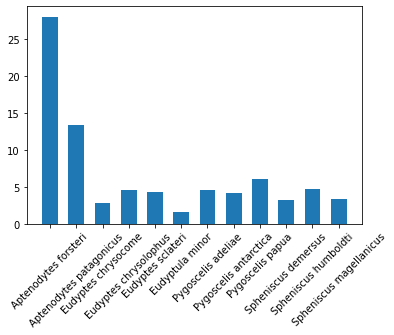

In [810]:
plt.bar(x=penguins_df["species"],
       height=penguins_df["mass"], width=0.6)
plt.xticks(rotation=45)

9) Scatter Plot of Molecular Weight and GC Content

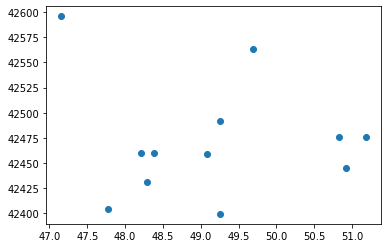

In [812]:
plt.scatter("GC Content" ,"Molecular Weight", data=penguins_df)

10) Saving DataFrame 

In [815]:
penguins_df.to_csv("penguins_df_update.csv", index=False, encoding="utf-8")